In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

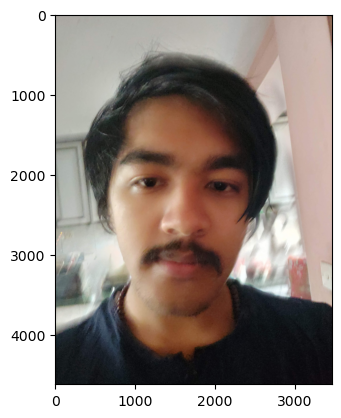

In [81]:
#Testing with an image
img = cv2.imread("./test_images/2.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [82]:
#HaarCascade
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")


In [83]:
#Making the image of only 1 channel
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray

array([[165, 165, 165, ...,  61,  62,  62],
       [165, 165, 165, ...,  63,  64,  64],
       [165, 165, 165, ...,  65,  65,  66],
       ...,
       [ 22,  24,  24, ...,  12,  16,  19],
       [ 24,  24,  24, ...,  14,  14,  15],
       [ 24,  25,  24, ...,  15,  12,  10]], dtype=uint8)

# Marking the face

In [84]:
faces = face_cascade.detectMultiScale(gray,1.3,5)
(x,y,w,h)=faces[0]
faces

array([[ 371, 1142, 2411, 2411]])

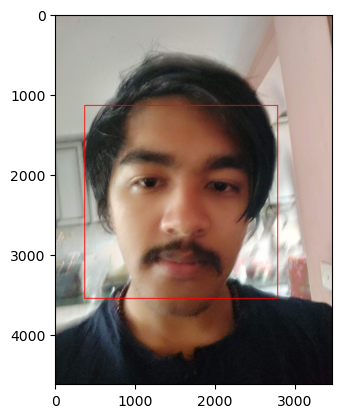

In [85]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    plt.imshow(face_img)
    plt.show()

[[1987 1430   45   45]
 [ 290  683   47   47]
 [2279 1225   96   96]
 [ 544  699  546  546]
 [ 185 1324  128  128]
 [ 663 1676  462  462]
 [1445  793  467  467]
 [  19 1456   58   58]
 [2008 1336  168  168]
 [ 338 1577   56   56]
 [ 279 1559   71   71]
 [ 211 2184  218  218]
 [1030 1536   86   86]]


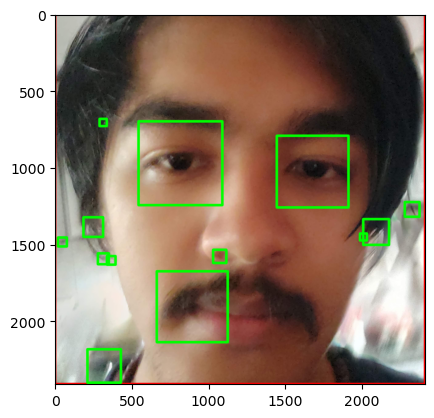

In [86]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),15)
    roi_gray = gray[y:y+h,x:x+h]
    roi_color = face_img[y:y+h,x:x+h]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        face_img = cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),15)
        #cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0))
plt.figure()
plt.imshow(face_img)
plt.show()

# Croping the image if it has two eyes

In [87]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0))
        roi_gray = gray[y:y+h,x:x+h]
        roi_color = face_img[y:y+h,x:x+h]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes) >=2):
            return roi_color

In [88]:
def cropping_image(img_path):
    plt.imshow(cv2.imread(img_path))
    plt.show()
    plt.imshow(get_cropped_image_if_2_eyes(img_path))


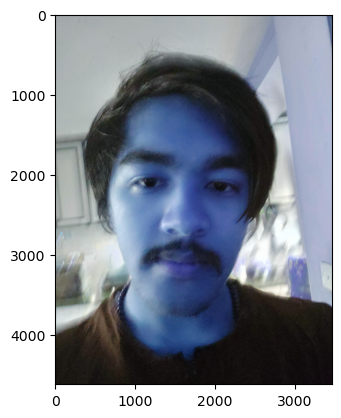

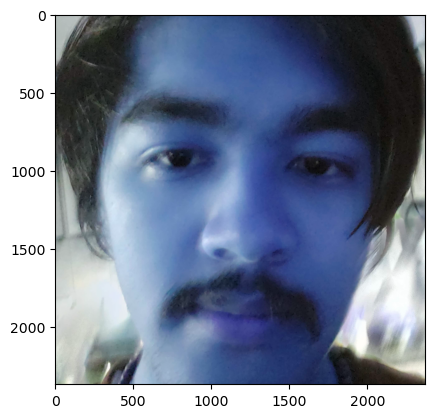

In [89]:
cropping_image('./test_images/2.jpg')


# Croping only the face of the images 

In [90]:
path_to_data = './dataset/'
path_to_cr_data ='./dataset/cropped/'

In [91]:
import os
img_dirs =[]
for entry in os.scandir(path_to_data):
#     print(entry)
    img_dirs.append(entry.path)

In [92]:
img_dirs

['./dataset/anish',
 './dataset/avaya',
 './dataset/bipul_chettri',
 './dataset/rajesh_hamal']

In [104]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [105]:
img_dir ='./dataset/bipul_chettri'
for entry in os.scandir(img_dir):
    print(entry.path)
#     roi_color = get_cropped_image_if_2_eyes(entry.path)
#     if roi_color is not None:
#         cropped_folder = path_to_cr_data + celebrity_name
#         if not os.path.exists(cropped_folder):
#             os.makedirs(cropped_folder)
#             cropped_image_dirs.append(cropped_folder)
#             print("Generating cropped images in folder: ",cropped_folder)
#         cropped_file_name = celebrity_name + str(count) + ".png"
#         cropped_file_path = cropped_folder + "/" + cropped_file_name
#         cv2.imwrite(cropped_file_path, roi_color)
#         count += 1

./dataset/bipul_chettri\0029083836_10.jpg
./dataset/bipul_chettri\13734826_10101282569777190_913018855_n.jpg
./dataset/bipul_chettri\1594147299_bipul-chettri-1.jpg
./dataset/bipul_chettri\2022_NMC_Overlay_TwitterFBLinkedIn_1200x628_edited.jpg
./dataset/bipul_chettri\25022016095151Bipul_chettri_femnepal4-cop-1000x0.jpg
./dataset/bipul_chettri\45852e_be526ca06bbc4b0982a8bb282ec2b09b.jpg
./dataset/bipul_chettri\89300176-kathmandu-nepal-october-14-2017-concert-of-bipul-chettri-and-the-travelling-band-at-hotel-annapurna-.webp
./dataset/bipul_chettri\89300180-kathmandu-nepal-october-14-2017-concert-of-bipul-chettri-and-the-travelling-band-at-hotel-annapurna-.webp
./dataset/bipul_chettri\Allarey-Jovan.jpg
./dataset/bipul_chettri\artworks-000158892067-9xcvte-t500x500.jpg
./dataset/bipul_chettri\artworks-000194307318-5hw9wa-t500x500.jpg
./dataset/bipul_chettri\Bipul-Chettri (1).jpg
./dataset/bipul_chettri\Bipul-Chettri (2).jpg
./dataset/bipul_chettri\Bipul-Chettri-7.jpg
./dataset/bipul_chettri\

In [106]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
#         print(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/anish
Generating cropped images in folder:  ./dataset/cropped/avaya
Generating cropped images in folder:  ./dataset/cropped/bipul_chettri
Generating cropped images in folder:  ./dataset/cropped/rajesh_hamal
